<a href="https://colab.research.google.com/github/abhinav9629/Yoga107/blob/main/Tf_pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
!pip install tf_pose

     |████████████████████████████████| 7.3MB 4.3MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
     |████████████████████████████████| 110.5MB 48kB/s 
     |████████████████████████████████| 296kB 43.1MB/s 
     |████████████████████████████████| 512kB 20.0MB/s 
     |████████████████████████████████| 2.9MB 30.6MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 3.8MB 20.6MB/s 
  Created wheel for tf-pose: filename=tf_pose-0.11.0-cp37-cp37m-linux_x86_64.whl size=7475887 sha256=68ff7a618df93b32492e915fc6d1fee1153fe1c84509455c17102d20dd639829
  Stored in directory: /root/.cache/pip/wheels/2b/ed/67/a63b2651779d6d295143eaad3d4d618c2b9aa0ace41f69f6c4
  Created wheel for dill: filename=dill-0.2.7.1-cp37-none-any.whl size=54563 sha256=2cf0effcfbc08ee0e669d72d733e3379fa30ca5a281004e6c652b2e5a42cbdd6
  Stored in directory: /root/.cache/pip/wheels/99/c4/ed/1b64d2d5809e60d5a36855304

In [ ]:
import sys
import time
import logging
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow.keras as keras

In [ ]:
from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh


In [62]:
model='mobilenet_thin'
resize='432x368'
w, h = model_wh(resize)

In [63]:
e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2021-06-18 14:01:04,419] [TfPoseEstimator] [INFO] loading graph from /usr/local/lib/python3.7/dist-packages/tf_pose_data/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimator/M

In [73]:
image_path = '/content/MyDrive/MyDrive/DATASETS/Yoga Dataset/dataset/tadasana/34. tadasana-suzlyfe-yoga-clinic.png'
image = common.read_imgfile(image_path, None, None)


In [74]:
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)

In [75]:
image = TfPoseEstimator.draw_humans(image,humans,imgcopy=False)


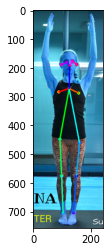

In [76]:
plt.imshow(image)